# Red Wine Quality Classification

## 데이터 소개

UCI Machine Learning

TASK : Red wine Classification

csv 파일의 컬럼은 아래와 같습니다.

*   index : 구분자
*   quality : 품질
*   fixed acidity : 산도
*   volatile acidity : 휘발성산
*   citric acid : 시트르산
*   residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
*   chlorides : 염화물
*   free sulfur dioxide : 독립 이산화황
*   total sulfur dioxide : 총 이산화황
*   density : 밀도
*   pH : 수소이온농도
*   sulphates : 황산염
*   alcohol : 도수
*   type : 종류



# ML 분반 Week3 (Classification) 과제
## 제출자: 김나연

In [ ]:
# # 구글 드라이브에 코랩을 연동
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [23]:
# loading data ,your own file path
df = pd.read_csv('./ML_week3_HW_datasets/winequality-red.csv', sep = ';')

## EDA(Exploratory Data Analysis)

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Q1 Data brief review : info() 함수를 통해 알아낼 수 있는 정보를 작성하시오. (**빈칸 ## 4개를 채우시오**)


답: It turns out that the dataset does not have (null) values. The dataset consists of (1599) rows and (12) columns. The data type of all variables are (numeric).



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Q2 결측치 확인
결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 처리해보세요.

결측치는 판단에 따라 drop(제거) 할 수 있고, 특정 값으로 채울(대체) 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [27]:
# 결측치 확인
## df의 결측치의 총 합을 확인하는 코드를 작성하세요. sum()을 2번 사용하시오.

print("Totally there are {} null values in the dataset".format(df.isna().sum(axis=0).sum()))

Totally there are 0 null values in the dataset


## Q3 데이터 분포 확인
각 변수의 데이터 분포가 어떠한지 기술하시오.(맨 위의 세개의 변수에 대해서만 기술)

1. 'fixed_acidity' : right-skewed, peak around 7
2. 'volatile_acidity' : right-skewed, bimodal distribution
3. 'citric_acid' : right-skewed, multimodal distribution

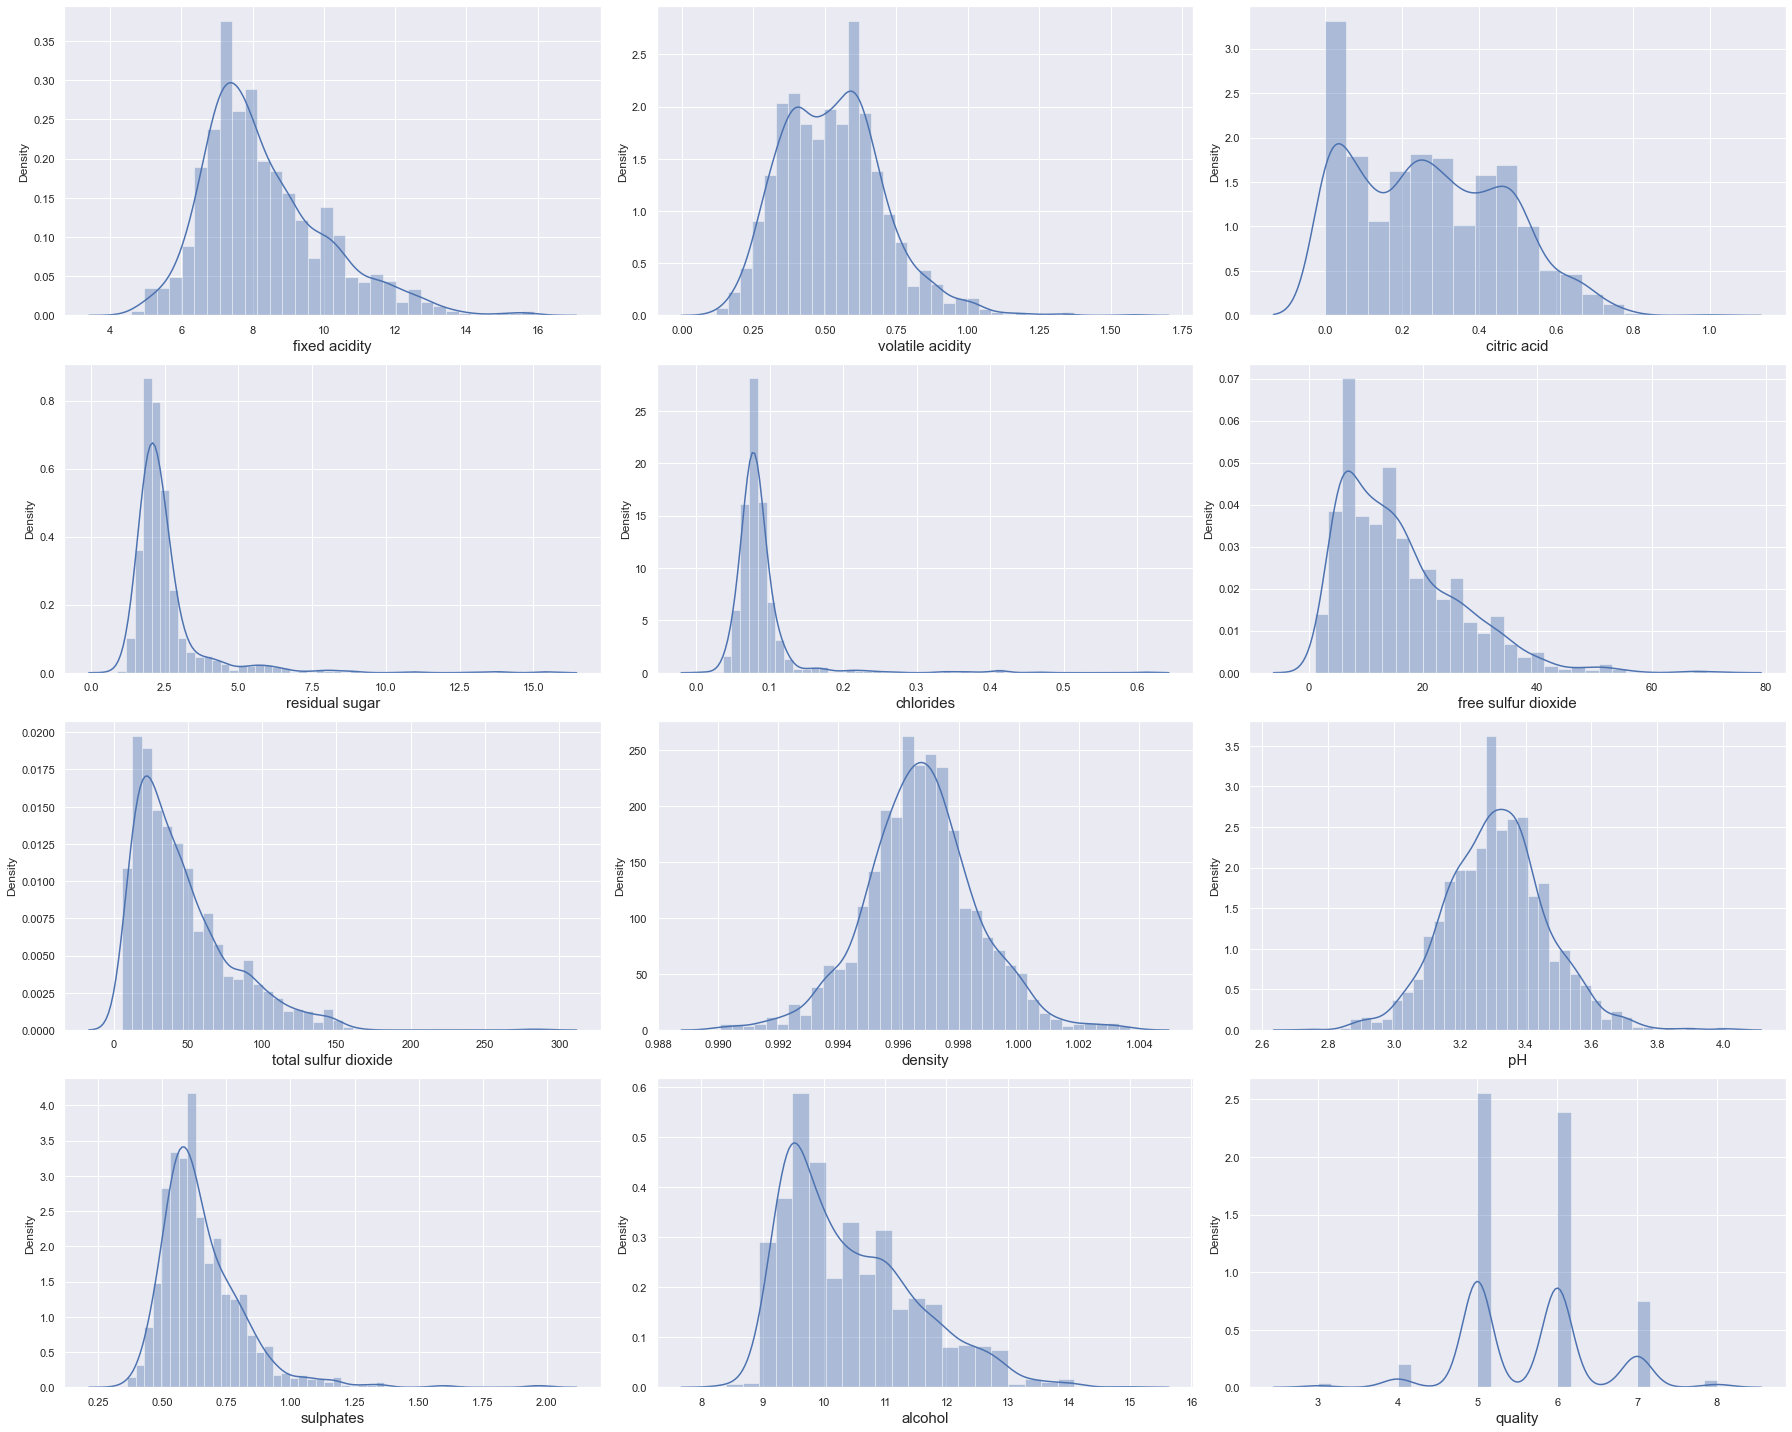

In [28]:
# let's see how data is distributed for every column
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Q4. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

더불어 multicollinearity(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제)에 주목하여, 해당 correlation plot에서 어떤 영향을 주고 있는지 있는지 예를 들어 기술하시오.

답:   
- pH와 산을 나타내는 지표인 citric acid, fixed acidity 등이 강한 음의 상관관계를 보임  
- 이외에 free sulfur dioxide, total sulfur dioxide 또한 0.67의 강한 양의 상관관계를 보임(total SO2 = free SO2 + combined SO2이므로 그럴 수밖에 ..)  
- VIF 등을 확인하여 다중공선성이 있다 판단되는 변수 중 취사선택할 필요성



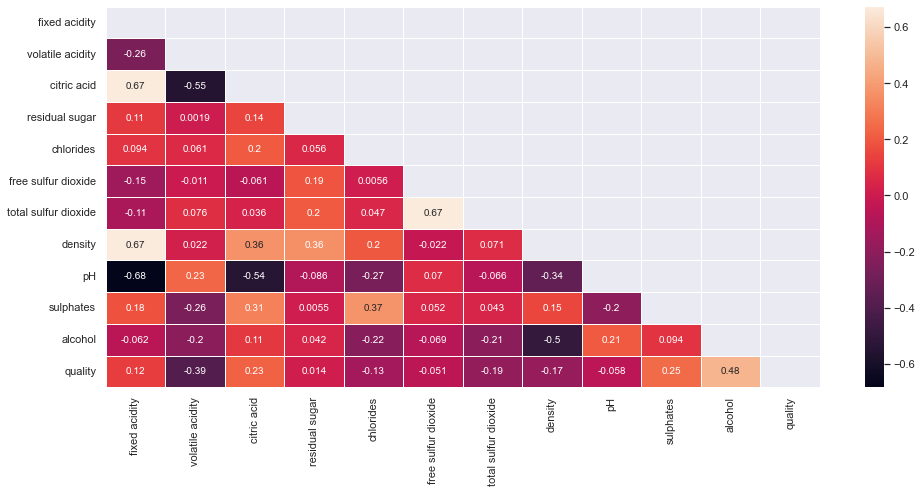

In [18]:
# 상관관계 plot
plt.figure(figsize = (16, 7))

corr = df.corr()
##에 들어갈 코드를 작성하시오.
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

In [19]:
#Pearson correlation coefficient
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["free sulfur dioxide"],df["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["density"]))

Pearson correlation coefficient: (-0.49617977024170384, 3.9388353399818564e-100)
Pearson correlation coefficient: (0.667666450481022, 6.404722954679305e-207)
Pearson correlation coefficient: (-0.68297819456853, 4.063034039858994e-220)
Pearson correlation coefficient: (-0.5419041447395095, 1.0072013259121818e-122)
Pearson correlation coefficient: (0.6680472921189727, 3.074747060867737e-207)


## Q5. Divide quality range into 2 parts
In this dataset quality range is between 3 and 8
We will divide quality range into two parts:



*   High quality wine: 6 - 8
*   Low quality wine: 3 - 5



In [33]:
sorted(df['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [34]:
df["quality"] = df['quality'].apply(lambda x: 0 if 3<=x<=5 else 1)
##에 들어갈 코드를 작성하시오.
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [35]:
df.head().style.background_gradient(cmap = "Reds")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0


## Q6. 종속변수(y,label)은 무엇이 되어야 하나요?


In [36]:
# we select dependent variable (label)
y = df["quality"] ##을 채우시오.

# we select independent variable
x = df.drop("quality", axis = 1) ##을 채우시오.

In [37]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

## Q7.왜 Standardization(StandardScaler, MinMaxScaler 등) 사용할까요? 두 Scaler의 특징에 대해 조사하고, 보다 적절한 Scaler가 무엇일지 그 이유와 함께 적어주세요.

답 : MinMaxScaler -> 각 feature가 bell-shape이 아닌 경우가 많고, 표준편차가 전체적으로 작기 때문

**StandardScaler**
- z value로 평균을 0으로, 표준편차를 1로 하여 data point 반환
- 데이터가 Gaussian distribution에 기인한다 가정
- 이상치에 민감

**MinMaxScaler**
- 최솟값을 0으로, 최댓값을 1로 설정하여 data point 반환
- 데이터가 bell-shape이 아니거나 표준편차가 작은 경우 효과적
- 이상치에 민감


In [39]:
# scaling data
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

## Q7-5. 위의 코드에서, train dataset에 대해서는 fit_transform을, test dataset에 대해서는 transform을 실시하는 이유가 무엇일지 조사해주세요.
답 : 기존의 train data에서 나온 test set은 unknown이라는 전제인데 fit_transform()을 진행하면 각 feature에 대해 새로운 mean, variance를 계산하여 train, test set이 다른 분포를 지니게 됨 

In [40]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [41]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int64
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64
(400,)


## Q8. Building Classification models

이번 코드에서는 non parametric model; knn을 사용하여 train, test 진행해보았습니다.

아래의 코드 외에도 원하는 한가지 classification 모델(KNN 제외)을 선정하여 아래의 과정을 반복하고, 그 결과를 해석하세요. grid search 과정은 거치지 않고 임의의 파라미터값으로 진행해도 좋습니다.

In [ ]:
##아래의 과정을 반복하시오.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#KNN

knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [43]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [44]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')

In [45]:
from sklearn.metrics import accuracy_score
y_pred = knn_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #Validation Set Accurac

Accuracy: 0.8025


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



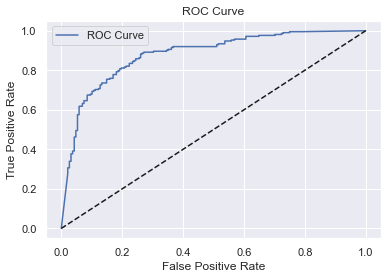

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
# Validation Set 에 대한 예측확률 계산
y_prob = knn_model.predict_proba(x_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc_params = {
  "n_estimators" : [5,10,20,30,50,100],
  "max_features" : ['auto','sqrt'],
  "max_depth" : [int(x) for x in np.linspace(10,100,num=10)],
  "bootstrap" : [True, False]
}

In [54]:
rfc_cv = GridSearchCV(rfc, rfc_params, cv=10)
rfc_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [5, 10, 20, 30, 50, 100]})

In [55]:
print("Best score for train set: " + str(rfc_cv.best_score_))

print("____________________________________________")

print(rfc_cv.best_params_)

Best score for train set: 0.8165196078431374
____________________________________________
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}


In [62]:
rfc_model = RandomForestClassifier(
  n_estimators= rfc_cv.best_params_['n_estimators'],
  max_features= rfc_cv.best_params_['max_features'],
  max_depth= rfc_cv.best_params_['max_depth'],
  bootstrap= rfc_cv.best_params_['bootstrap']
)
rfc_model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = rfc_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #Validation Set Accurac

Accuracy: 0.82


# 수고하셨습니다.